<div class='alert alert-success'>
    <h1 align="center">Local Search Algorithms: Simulated Annealing for N-Queens</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
import sys
import time
import math
import random
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import clear_output

from utils import timed
from nqueens import NQueensState, NQueensStatePermutation

plt.rcParams['figure.figsize'] = (6, 6)

## N-Queens Problem
- **Goal**: Place N queens on a N-by-N chess board so that no two queens can attack each other.
- Thus a solution requires that no two queens share the same row, column or diagonal.

<p align="center">
    <img src="imgs/Four-Queens-Local-Search.png" width="80%">
</p>
<h6 align="center">4-Queens problem</h6>

### Problem formulation: First formulation
- **States**: each column contains only one queen.
- **Actions**: move a queen to another row in its column.
- **State Space Size**: $N^N$


### Problem formulation: Second formulation (Permuatation)
- **States**: each column and each row contains only one queen.
- **Actions**: move a queen to another row in its column which is not occupied.
- **State Space Size**: $N!$

In [2]:
state = NQueensState.random_state(N=8)
print(state)

[6, 3, 5, 5, 2, 8, 6, 7] <6>


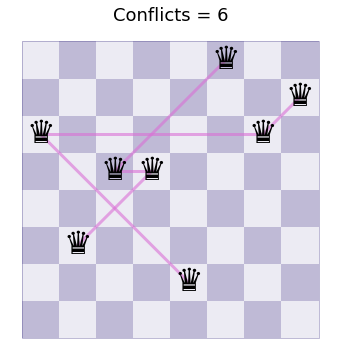

In [3]:
state.plot(show_conflicts=True)

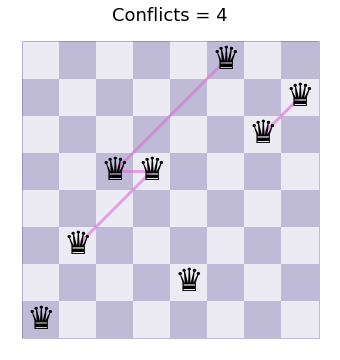

In [4]:
best_neighbor = state.best_neighbor()
best_neighbor.plot(show_conflicts=True)

In [5]:
best_neighbor

NQueensState(queens=[1, 3, 5, 5, 2, 8, 6, 7])

## Simulated Annealing
<img src="imgs/simulated_annealing.png" width="80%">

In [6]:
class SimulatedAnnealing:
    def __init__(self):
        self.history = []
        self.T = None
    
    def search(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        self.T = T0
        current = state

        while True:

            clear_output(wait=True)
            if verbose == 0: print(f'T = {self.T:.8f}, Conflicts = {current.conflicts():d}')
            elif verbose == 1: print(current)
            elif verbose == 2: current.plot(show_conflicts=False)
            elif verbose == 3: current.plot(show_conflicts=True)
            
            self.history.append(current)

            if self.T < tol or current.conflicts() == 0:
                return current

            neighbor = current.random_neighbor()
            delta_E = current.conflicts() - neighbor.conflicts()
            if delta_E >= 0: 
                current = neighbor
            elif random.random() < math.exp(delta_E / self.T):
                current = neighbor

            self.T = alpha * self.T

        return current
    
    def __call__(self, state, T0=10, alpha=0.99, tol=1e-8, verbose=0):
        return self.search(state, T0, alpha, tol, verbose)
    

    def plot_history(self):
        plt.figure(figsize=(12, 4))

        conflicts = [state.conflicts() for state in self.history]
        plt.plot(range(len(conflicts)), conflicts)
        plt.xlabel('Iteration')
        plt.ylabel('Conflicts')
        plt.show()

In [7]:
initial_state = NQueensState.random_state(200)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000001, Conflicts = 8


<Solution with 8 conflicts found in 88.53 secs.>
 [72, 126, 195, 8, 184, 55, 61, 164, 12, 133, 45, 104, 117, 100, 111, 56, 150, 127, 196, 115, 88, 81, 64, 82, 14, 10, 158, 101, 91, 85, 125, 175, 162, 31, 48, 185, 63, 145, 99, 188, 160, 129, 38, 83, 37, 79, 13, 112, 154, 134, 68, 25, 189, 157, 98, 109, 17, 36, 186, 3, 89, 160, 30, 35, 84, 183, 41, 43, 93, 76, 181, 148, 45, 151, 77, 167, 33, 178, 7, 179, 50, 39, 2, 197, 92, 194, 70, 24, 200, 5, 67, 122, 141, 177, 47, 96, 147, 176, 87, 170, 95, 34, 73, 119, 142, 18, 130, 146, 123, 27, 192, 52, 4, 110, 180, 152, 191, 139, 28, 62, 19, 75, 169, 190, 41, 44, 114, 51, 49, 9, 23, 97, 11, 29, 187, 163, 135, 120, 159, 171, 198, 26, 124, 153, 161, 94, 46, 78, 86, 113, 183, 48, 143, 1, 166, 149, 42, 15, 60, 21, 69, 116, 76, 74, 144, 22, 168, 193, 108, 32, 102, 59, 40, 6, 61, 103, 182, 155, 90, 121, 131, 173, 105, 118, 132, 172, 136, 16, 71, 65, 199, 58, 107, 138, 156, 66, 20, 88, 137, 53] <8>


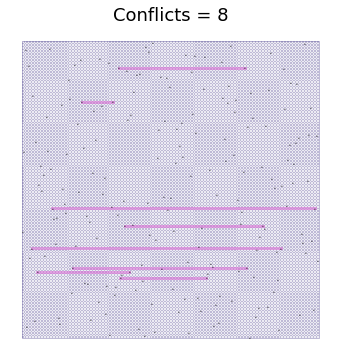

In [8]:
solution.plot(width=1024, height=1024, show_conflicts=True)

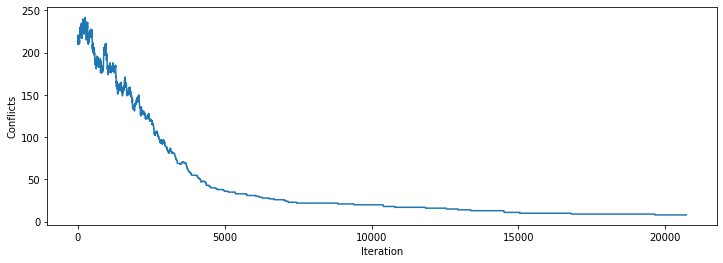

In [9]:
sa.plot_history()

In [10]:
def update_plot(i, show_conflicts):
    state = sa.history[i - 1]
    state.plot(width=1024, height=1024, show_conflicts=show_conflicts)

In [11]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=20714, min=1), Checkbox(value=True, description…

## Permutation

In [13]:
initial_state = NQueensStatePermutation.random_state(200)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.999, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000077, Conflicts = 0


<Solution with 0 conflicts found in 47.17 secs.>
 [151, 180, 166, 147, 37, 132, 155, 164, 8, 112, 134, 74, 88, 123, 129, 30, 153, 165, 113, 93, 172, 60, 41, 79, 90, 114, 198, 135, 81, 199, 6, 176, 191, 124, 89, 95, 83, 163, 67, 160, 138, 154, 103, 121, 98, 68, 19, 197, 142, 192, 34, 158, 187, 133, 43, 1, 104, 61, 25, 156, 105, 49, 36, 28, 51, 3, 26, 12, 9, 200, 186, 63, 31, 2, 101, 52, 87, 189, 119, 11, 111, 125, 77, 170, 82, 56, 21, 65, 7, 22, 120, 173, 167, 150, 38, 53, 181, 23, 18, 148, 40, 169, 118, 110, 126, 33, 196, 109, 47, 16, 161, 15, 73, 137, 69, 140, 17, 5, 29, 116, 178, 75, 32, 54, 195, 107, 146, 141, 193, 85, 78, 149, 144, 168, 97, 14, 174, 42, 20, 185, 108, 184, 91, 171, 152, 136, 182, 99, 57, 27, 39, 157, 4, 96, 194, 71, 139, 72, 44, 59, 102, 130, 179, 159, 190, 86, 145, 58, 70, 131, 175, 46, 162, 183, 48, 13, 35, 128, 177, 66, 24, 94, 55, 100, 10, 122, 50, 188, 115, 84, 62, 76, 117, 127, 64, 92, 143, 45, 106, 80] <0>


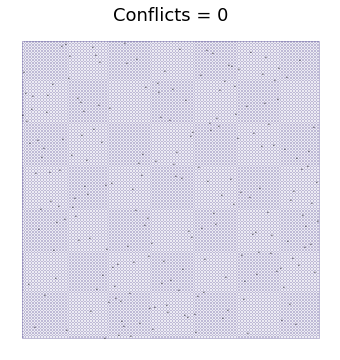

In [14]:
solution.plot(width=1024, height=1024, show_conflicts=True)

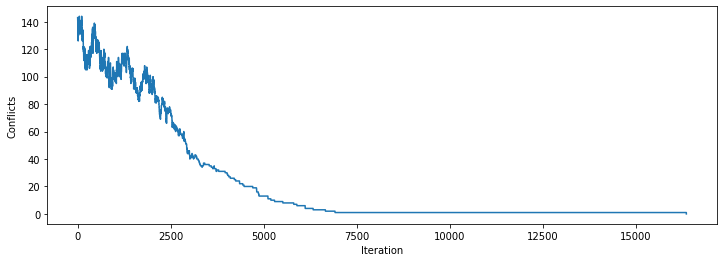

In [15]:
sa.plot_history()

In [16]:
i = widgets.IntSlider(value=1, min=1, max=len(sa.history), description='i:')
show_conflicts = widgets.Checkbox(value=True, description='Show conflicts')

widgets.interact(update_plot, i=i, show_conflicts=show_conflicts);

interactive(children=(IntSlider(value=1, description='i:', max=16367, min=1), Checkbox(value=True, description…

## Animation

In [17]:
N = 10
initial_state = NQueensState.random_state(N)

sa = SimulatedAnnealing()
t, solution = timed(sa, state=initial_state, T0=10, alpha=.98, verbose=0)
print(f'\n\n<Solution with {solution.conflicts()} conflicts found in {t:.2f} secs.>\n {solution}')

T = 0.00000047, Conflicts = 0


<Solution with 0 conflicts found in 0.50 secs.>
 [1, 6, 4, 10, 7, 9, 3, 5, 2, 8] <0>


In [18]:
len(sa.history)

836

In [19]:
# remove states that are equal to their previous state in the history
def summarize_history(history):
    reduced = [history[0]]
    for i in range(1, len(history)):
        if history[i].queens != reduced[-1].queens:
            reduced.append(history[i])
    return reduced

history = summarize_history(sa.history)
print(len(history))

121


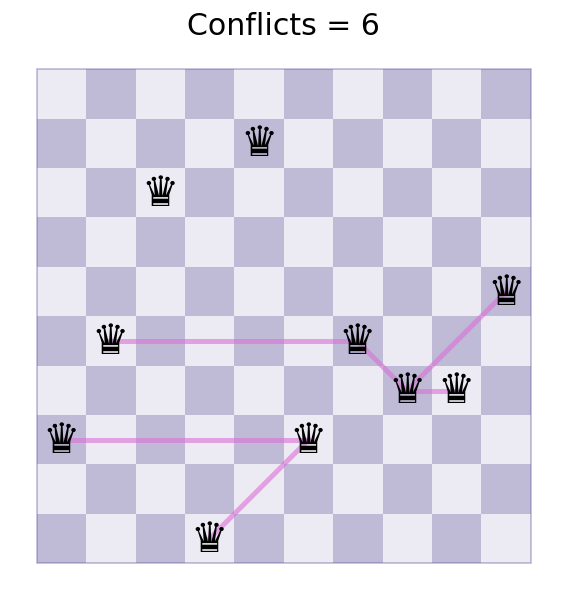

In [21]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
rc('animation', html='html5')


fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)


def animate(i):
    ax.clear()
    state = history[i]
    state.plot(ax, show_conflicts=True)

anim = FuncAnimation(fig, animate, frames=range(len(history)), interval=200, repeat=True)


anim.save(f'imgs/{N}-queens.gif', writer='imagemagick')

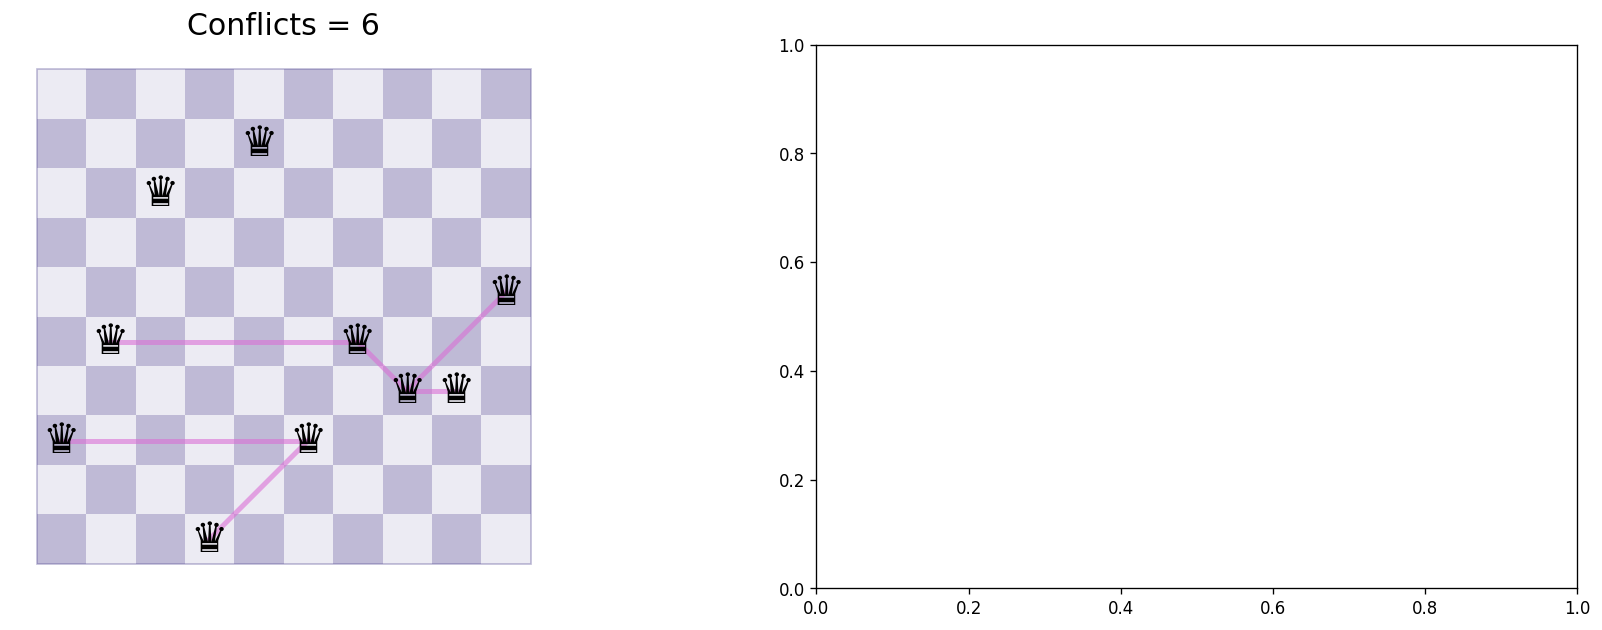

In [22]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
rc('animation', html='html5')

fig = plt.figure(figsize=(18, 6), dpi=120)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


def animate(i):
    ax1.clear()
    ax2.clear()
    state = history[i]
    state.plot(ax1, show_conflicts=True)
    
    ax2.plot([s.conflicts() for s in history[:i]])
    ax2.set_xlim(0, len(history))
    ax2.set_ylim(0, max([s.conflicts() for s in history]))
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Conflicts')



anim = FuncAnimation(fig, animate, frames=range(len(history)), interval=200, repeat=True)
anim.save(f'imgs/{N}-queens.gif', writer='imagemagick')

In [23]:
anim